<a href="https://colab.research.google.com/github/kingcodes02/Time-Series-Forcasting/blob/main/05%20-%20Smoothing_Methods_(_Moving_Average).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os

In [3]:
os.chdir('/content/drive/MyDrive/complete-time-series/6-Smooting_Techniques')

In [4]:
ls data

us_airline_carrier_passenger.csv


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [6]:
# load data and preprocessing
df = pd.read_csv('data/us_airline_carrier_passenger.csv')
df.head()

,month,passengers
0,2000-01-01,46492
1,2000-02-01,48526
2,2000-03-01,58764
3,2000-04-01,56033
4,2000-05-01,58201


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   month       240 non-null    object
 1   passengers  240 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.9+ KB


In [8]:
df['month'] = pd.to_datetime(df['month'])
df.dtypes

month         datetime64[ns]
passengers             int64
dtype: object

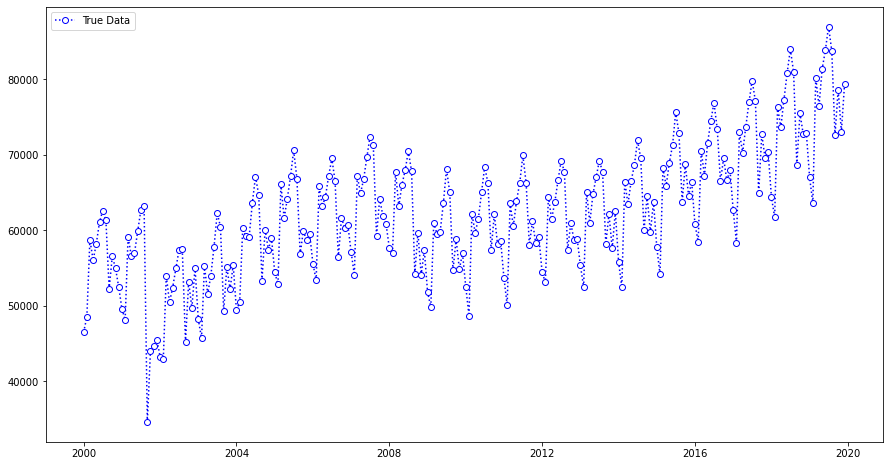

In [9]:
# visualization
plt.figure(figsize=(15, 8))
plt.plot(df['month'], df['passengers'], 'bo:', markerfacecolor='w');

plt.legend(['True Data'])

In [10]:
# train (upto 2016 Dec)
# test
date = '2016-12-01'
df_train = df[df['month'] <= datetime.datetime.strptime(date, '%Y-%m-%d')]
df_test = df[df['month'] > datetime.datetime.strptime(date, '%Y-%m-%d')]

In [11]:
df_train.head()

,month,passengers
0,2000-01-01,46492
1,2000-02-01,48526
2,2000-03-01,58764
3,2000-04-01,56033
4,2000-05-01,58201


In [12]:
df_test.head()

,month,passengers
204,2017-01-01,62621
205,2017-02-01,58377
206,2017-03-01,72962
207,2017-04-01,70262
208,2017-05-01,73679


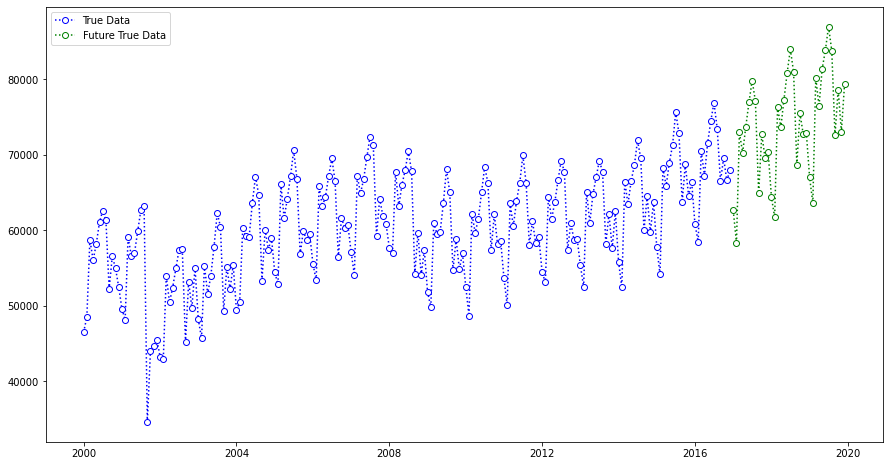

In [13]:
# visualization
plt.figure(figsize=(15, 8))
plt.plot(df_train['month'], df_train['passengers'], 'bo:', markerfacecolor='w')
plt.plot(df_test['month'], df_test['passengers'], 'go:', markerfacecolor='w');

plt.legend(['True Data', 'Future True Data']);

# Naive Forecasting Model

> $ Y_{t+1} = Y_t $

In [14]:
df_train['fitted_values'] = df_train['passengers'].shift()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
df_train.head()

,month,passengers,fitted_values
0,2000-01-01,46492,NaN
1,2000-02-01,48526,46492.0
2,2000-03-01,58764,48526.0
3,2000-04-01,56033,58764.0
4,2000-05-01,58201,56033.0


In [16]:
df_train.tail()

,month,passengers,fitted_values
199,2016-08-01,73450,76886.0
200,2016-09-01,66477,73450.0
201,2016-10-01,69539,66477.0
202,2016-11-01,66591,69539.0
203,2016-12-01,67983,66591.0


In [17]:
df_test['forecast'] = 67983
df_test.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,month,passengers,forecast
204,2017-01-01,62621,67983
205,2017-02-01,58377,67983
206,2017-03-01,72962,67983
207,2017-04-01,70262,67983
208,2017-05-01,73679,67983


In [18]:
# margin of error
error = df_train['passengers'] - df_train['fitted_values']
ME = 1.96 * error.std() # 95% ME

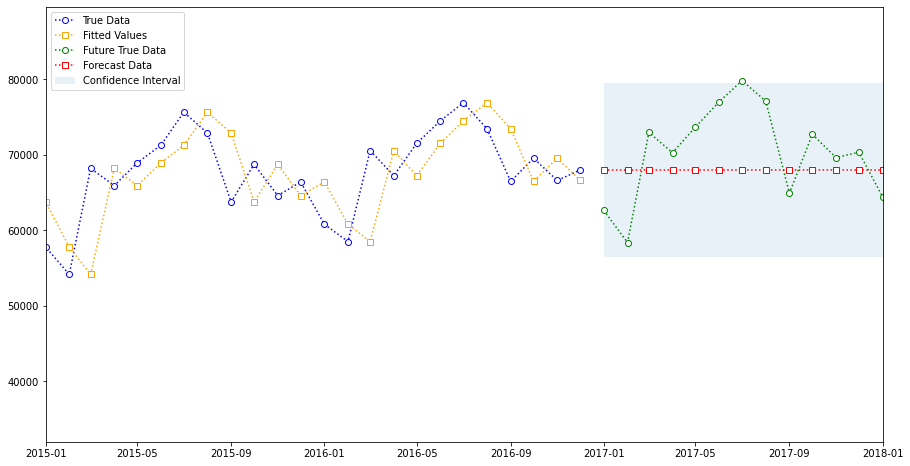

In [19]:
# visualization
plt.figure(figsize=(15, 8))
plt.plot(df_train['month'], df_train['passengers'], 'bo:', markerfacecolor='w')
# fitted values
plt.plot(df_train['month'], df_train['fitted_values'], 's:', color='orange', markerfacecolor='w')

plt.plot(df_test['month'], df_test['passengers'], 'go:', markerfacecolor='w')
# forecasting
plt.plot(df_test['month'], df_test['forecast'], 's:', color='red', markerfacecolor='w');

# Fill confidence interval
plt.fill_between(df_test['month'], (df_test['forecast'] + ME), (df_test['forecast'] - ME), alpha=0.1)

# scaling
start_date = datetime.datetime.strptime('2015-01-01', '%Y-%m-%d')
end_date = datetime.datetime.strptime('2018-01-01', '%Y-%m-%d')
plt.axis(xmin=start_date,
         xmax=end_date)
plt.legend(['True Data', 'Fitted Values', 'Future True Data', 'Forecast Data', 'Confidence Interval']);

### Simple Moving Average

In [21]:
df_train_sma = df_train[['month', 'passengers']]
df_test_sma = df_test[['month', 'passengers']]

###SMA(3)

In [22]:
df_train_sma.head()

,month,passengers
0,2000-01-01,46492
1,2000-02-01,48526
2,2000-03-01,58764
3,2000-04-01,56033
4,2000-05-01,58201


In [25]:
df_train_sma['fitted_3'] = df_train_sma.rolling(window=3).mean() # mean, median, std, var

In [26]:
df_train_sma.tail()

,month,passengers,fitted_3
199,2016-08-01,73450,74946.000000
200,2016-09-01,66477,72271.000000
201,2016-10-01,69539,69822.000000
202,2016-11-01,66591,67535.666667
203,2016-12-01,67983,68037.666667


In [31]:
df_test_sma['forecast'] = 68037.666667

In [33]:
df_test_sma.head()

,month,passengers,forecast
204,2017-01-01,62621,68037.666667
205,2017-02-01,58377,68037.666667
206,2017-03-01,72962,68037.666667
207,2017-04-01,70262,68037.666667
208,2017-05-01,73679,68037.666667


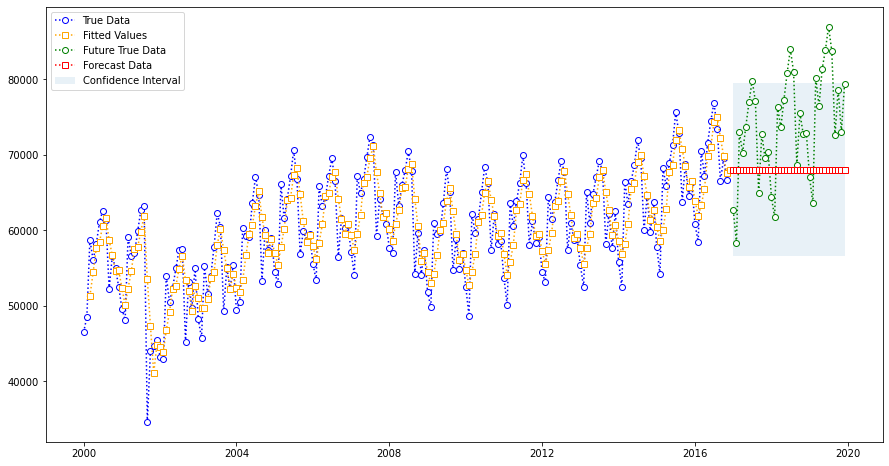

In [37]:
# margin of error
error_3 = df_train_sma['passengers'] - df_train_sma['fitted_3']
ME_3 = 1.96 * error.std() # 95% ME

# visualization
plt.figure(figsize=(15, 8))
plt.plot(df_train_sma['month'], df_train_sma['passengers'], 'bo:', markerfacecolor='w')
# fitted values
plt.plot(df_train_sma['month'], df_train_sma['fitted_3'], 's:', color='orange', markerfacecolor='w')

plt.plot(df_test_sma['month'], df_test_sma['passengers'], 'go:', markerfacecolor='w')
# forecasting
plt.plot(df_test_sma['month'], df_test_sma['forecast'], 's:', color='red', markerfacecolor='w');

# Fill confidence interval
plt.fill_between(df_test_sma['month'], (df_test_sma['forecast'] + ME_3), (df_test_sma['forecast'] - ME_3), alpha=0.1)

# scaling
# start_date = datetime.datetime.strptime('2015-01-01', '%Y-%m-%d')
# end_date = datetime.datetime.strptime('2018-01-01', '%Y-%m-%d')
# plt.axis(xmin=start_date,
#          xmax=end_date)
plt.legend(['True Data', 'Fitted Values', 'Future True Data', 'Forecast Data', 'Confidence Interval']);

### Weighted Moving Average

In [45]:
df_train_wma = df_train[['month', 'passengers']]
df_test_wma = df_test[['month', 'passengers']]

In [46]:
df_train_wma.head()

,month,passengers
0,2000-01-01,46492
1,2000-02-01,48526
2,2000-03-01,58764
3,2000-04-01,56033
4,2000-05-01,58201


**WMA(3)**

In [47]:
(3 * 58764 + 2 * 48526 + 1 * 46492) / (3+2+1)

53306.0

In [58]:
def weighted_moving_average(x):
  # x should in numpy array
  # generate weights
  weights = np.arange(1, len(x)+1, +1)
  num = np.sum(x * weights)
  den = np.sum(weights)
  wma = num / den
  print
  return wma

In [59]:
sample = df_train_wma.head()

In [60]:
sample

,month,passengers
0,2000-01-01,46492
1,2000-02-01,48526
2,2000-03-01,58764
3,2000-04-01,56033
4,2000-05-01,58201


In [61]:
sample['passengers'].rolling(window=3).apply(weighted_moving_average)

0             NaN
1             NaN
2    53306.000000
3    55692.166667
4    57572.166667
Name: passengers, dtype: float64

In [62]:
np.array([58764, 48526, 46492]) * np.array([3, 2, 1])

array([176292,  97052,  46492])

In [66]:
# applying to entire data
df_train_wma['fitted_wma_3'] = df_train_wma['passengers'].rolling(window=3).apply(weighted_moving_average)
df_train_wma['fitted_wma_62'] = df_train_wma['passengers'].rolling(window=62).apply(weighted_moving_average)

In [67]:
df_train_wma.head()

,month,passengers,fitted_wma_3,fitted_wma_62
0,2000-01-01,46492,NaN,NaN
1,2000-02-01,48526,NaN,NaN
2,2000-03-01,58764,53306.000000,NaN
3,2000-04-01,56033,55692.166667,NaN
4,2000-05-01,58201,57572.166667,NaN


In [68]:
df_train_wma.tail()

,month,passengers,fitted_wma_3,fitted_wma_62
199,2016-08-01,73450,74770.666667,65520.943164
200,2016-09-01,66477,70536.166667,65600.055300
201,2016-10-01,69539,69170.166667,65778.132104
202,2016-11-01,66591,67554.666667,65860.962622
203,2016-12-01,67983,67778.333333,65983.619560


In [69]:
df_test_wma['forecast'] = 67778.333333
df_test_wma['forecast_62'] = 65983.619560

**Plot with 62 lags**

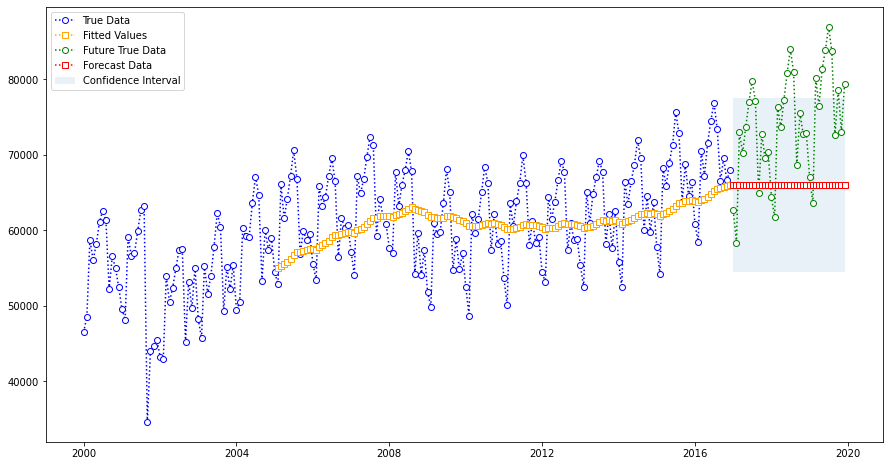

In [71]:
# margin of error
error_3 = df_train_wma['passengers'] - df_train_wma['fitted_wma_62']
ME_3 = 1.96 * error.std() # 95% ME

# visualization
plt.figure(figsize=(15, 8))
plt.plot(df_train_wma['month'], df_train_wma['passengers'], 'bo:', markerfacecolor='w')
# fitted values
plt.plot(df_train_wma['month'], df_train_wma['fitted_wma_62'], 's:', color='orange', markerfacecolor='w')

plt.plot(df_test_wma['month'], df_test_wma['passengers'], 'go:', markerfacecolor='w')
# forecasting
plt.plot(df_test_wma['month'], df_test_wma['forecast_62'], 's:', color='red', markerfacecolor='w');

# Fill confidence interval
plt.fill_between(df_test_wma['month'], (df_test_wma['forecast_62'] + ME_3), (df_test_wma['forecast_62'] - ME_3), alpha=0.1)

# scaling
# start_date = datetime.datetime.strptime('2015-01-01', '%Y-%m-%d')
# end_date = datetime.datetime.strptime('2018-01-01', '%Y-%m-%d')
# plt.axis(xmin=start_date,
#          xmax=end_date)
plt.legend(['True Data', 'Fitted Values', 'Future True Data', 'Forecast Data', 'Confidence Interval']);

### Exponential Moving Average

In [76]:
df_train_ema = df_train[['month', 'passengers']]
df_test_ema = df_test[['month', 'passengers']]

In [78]:
# ema
df_train_ema['fitted_3'] = df_train_ema['passengers'].ewm(min_periods=3, alpha=0.5).mean()

In [79]:
df_train_ema.head()

,month,passengers,fitted_3
0,2000-01-01,46492,NaN
1,2000-02-01,48526,NaN
2,2000-03-01,58764,54085.714286
3,2000-04-01,56033,55124.266667
4,2000-05-01,58201,56712.258065


In [80]:
df_train_ema.tail()

,month,passengers,fitted_3
199,2016-08-01,73450,73886.632073
200,2016-09-01,66477,70181.816036
201,2016-10-01,69539,69860.408018
202,2016-11-01,66591,68225.704009
203,2016-12-01,67983,68104.352005


In [81]:
df_test_ema['forecast_3_0.5'] = 68104.352005

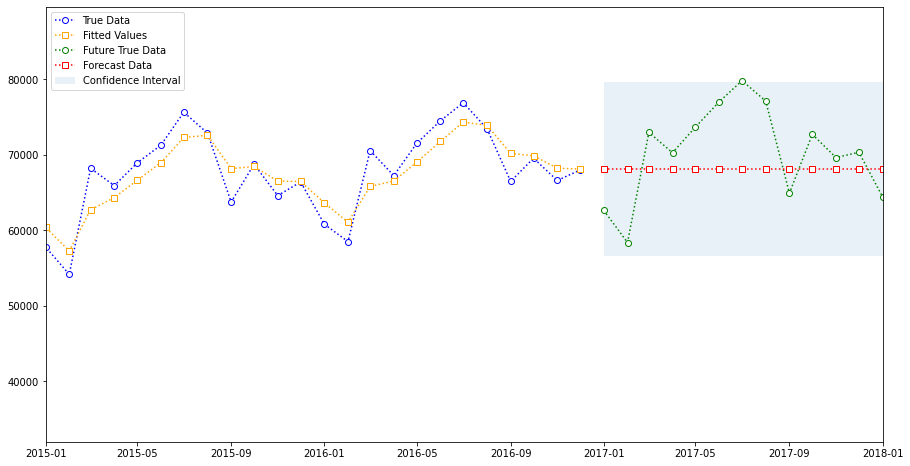

In [84]:
# margin of error
error_0_3 = df_train_ema['passengers'] - df_train_ema['fitted_3']
ME_0_3 = 1.96 * error.std() # 95% ME

# visualization
plt.figure(figsize=(15, 8))
plt.plot(df_train_ema['month'], df_train_ema['passengers'], 'bo:', markerfacecolor='w')
# fitted values
plt.plot(df_train_ema['month'], df_train_ema['fitted_3'], 's:', color='orange', markerfacecolor='w')

plt.plot(df_test_ema['month'], df_test_ema['passengers'], 'go:', markerfacecolor='w')
# forecasting
plt.plot(df_test_ema['month'], df_test_ema['forecast_3_0.5'], 's:', color='red', markerfacecolor='w');

# Fill confidence interval
plt.fill_between(df_test_ema['month'], (df_test_ema['forecast_3_0.5'] + ME_0_3), (df_test_ema['forecast_3_0.5'] - ME_0_3), alpha=0.1)

# scaling
# start_date = datetime.datetime.strptime('2015-01-01', '%Y-%m-%d')
# end_date = datetime.datetime.strptime('2018-01-01', '%Y-%m-%d')
# plt.axis(xmin=start_date,
#          xmax=end_date)
plt.legend(['True Data', 'Fitted Values', 'Future True Data', 'Forecast Data', 'Confidence Interval']);